#**Stock Market Time Series Forecasting (ASII.JK)**
###**PT Astra Internasional**

**Historical Data 2001 - 1 Oktober 2022**

Instalasi YFinance untuk Download Dataset

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Import Semua library yang diperlukan untuk Visualisasi Data, Rescalling dan Evalusi model

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
plt.style.use('fivethirtyeight')
import pandas as pd
import yfinance as yf
import seaborn as sns
import numpy as np
import requests
import datetime
import math
import time
import io
import os

menentuhkan tanggal awal dan akhir untuk pengambilan dataset Historical Data dari saham PT Astra Internasional

In [3]:
startDate = datetime.date(2000, 1, 1).strftime("%Y-%m-%d")
endDate = datetime.date(2022, 10, 1).strftime("%Y-%m-%d")
stockName = "PT Astra Internasional"
stockSymbol = 'ASII.JK'
print('start:', startDate)
print('end:', endDate)

start: 2000-01-01
end: 2022-10-01


Mengambil Dataset Historical Data PT Astra Internasional dari Yahoo Finance

In [4]:
df = yf.download(stockSymbol, start = startDate, end = endDate)

[*********************100%***********************]  1 of 1 completed


### **Data undestanding**

Untuk dataset saya memakai Dataset dari Yahoo Finance, yaitu dataset history harga saham PT Astra Internasional dari 2001 - sekarang.
[Yahoo Finance Pt Astra Internasional Historical Data](https://finance.yahoo.com/quote/ASII.JK/history?p=ASII.JK).
Dataset dari Historical Data tersebut memiliki Variabel-variabel pada Yahoo Finance ASII.JK History dataset adalah sebagai berikut:
- Date: tanggal dan waktu  pada hari perdagangan
- Open: harga pembukaan saham  pada hari perdagangan
- High: harga tertinggi saham  pada hari perdagangan
- Low: harga terendah saham  pada hari perdagangan
- Close: Harga saham penutupan perdagangan
- Adj Close	Harga penutupan di hitung dari 30 menit penutupan
- Volume: Volume Transaksi Bid/Offer pada hari perdagangan

In [5]:
df.info

<bound method DataFrame.info of                                   Open         High          Low        Close  \
Date                                                                            
2000-10-17 00:00:00+07:00   189.724136   192.815369   187.405716   187.792114   
2000-10-18 00:00:00+07:00   187.792114   188.951324   181.609665   181.996063   
2000-10-19 00:00:00+07:00   183.928085   187.405716   179.291245   186.246506   
2000-10-20 00:00:00+07:00   193.201767   195.133789   175.813614   177.745636   
2000-10-23 00:00:00+07:00   177.745636   181.609665   173.881592   175.813614   
...                                ...          ...          ...          ...   
2022-09-26 00:00:00+07:00  7000.000000  7025.000000  6850.000000  6975.000000   
2022-09-27 00:00:00+07:00  7000.000000  7050.000000  6950.000000  6950.000000   
2022-09-28 00:00:00+07:00  6950.000000  7000.000000  6800.000000  6800.000000   
2022-09-29 00:00:00+07:00  6850.000000  6900.000000  6700.000000  6775.000000

In [6]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-10-17 00:00:00+07:00,189.724136,192.815369,187.405716,187.792114,99.333611,30266285
2000-10-18 00:00:00+07:00,187.792114,188.951324,181.609665,181.996063,96.267754,45082402
2000-10-19 00:00:00+07:00,183.928085,187.405716,179.291245,186.246506,98.516068,43730189
2000-10-20 00:00:00+07:00,193.201767,195.133789,175.813614,177.745636,94.019478,212012808
2000-10-23 00:00:00+07:00,177.745636,181.609665,173.881592,175.813614,92.997520,84723602


LinePlot relasi Harga saham, Volume dengan waktu perdagangan

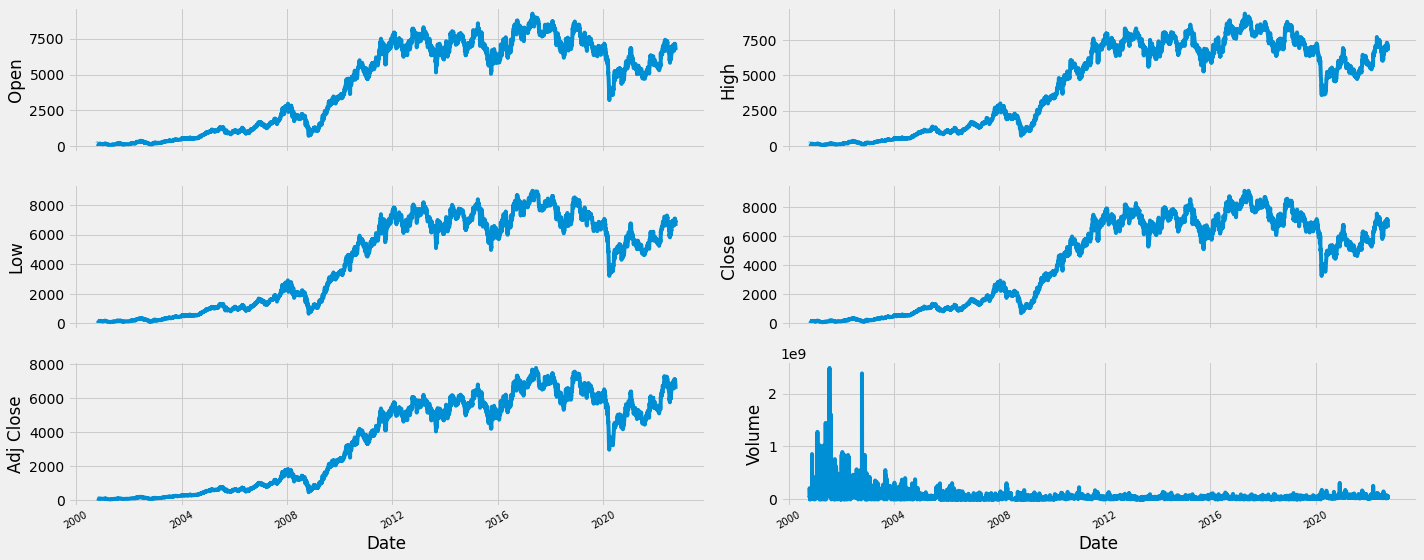

In [7]:
from matplotlib.pylab import tight_layout
df_plot = df.copy()
ncols = 2
nrows = int(round(df_plot.shape[1]/ncols, 0))
fig, ax = plt.subplots(nrows=nrows, ncols = ncols, sharex=True, figsize=(20, 8))
for i, ax in enumerate(fig.axes):
  sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
  ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
  ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig,tight_layout()
plt.show()

ScatterPlot relasi Harga saham, Volume dengan waktu perdagangan

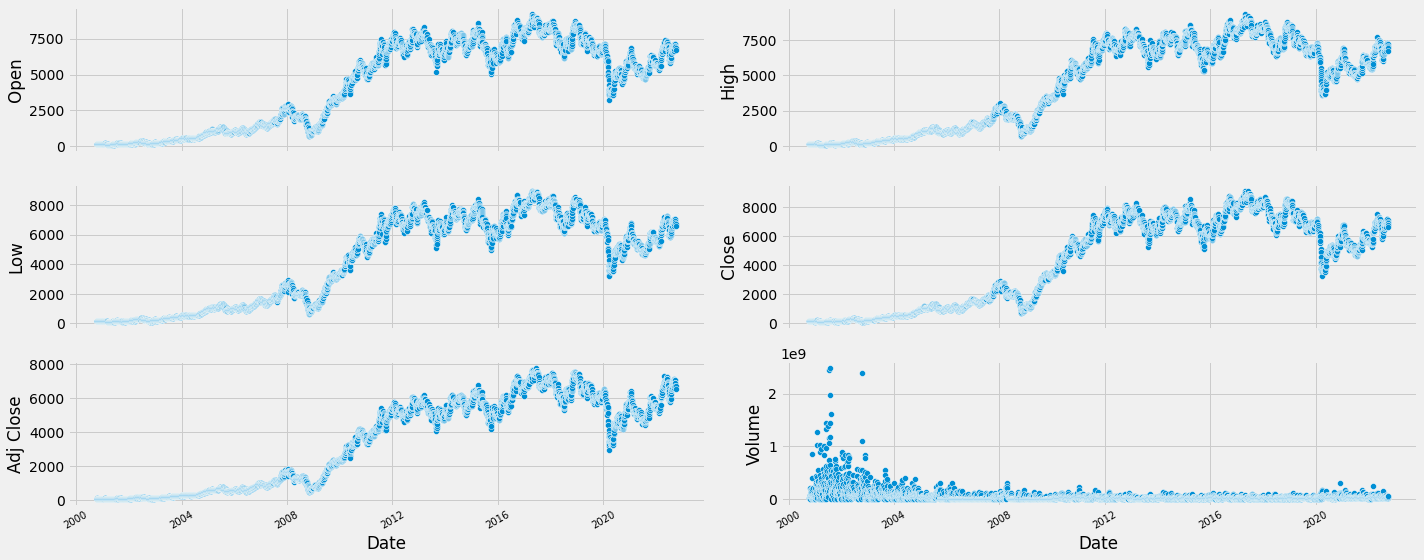

In [8]:
df_plot = df.copy()
ncols = 2
nrows = int(round(df_plot.shape[1]/ncols, 0))
fig, ax = plt.subplots(nrows=nrows, ncols = ncols, sharex=True, figsize=(20, 8))
for i, ax in enumerate(fig.axes):
  sns.scatterplot(data = df_plot.iloc[:, i], ax=ax)
  ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
  ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig,tight_layout()
plt.show()

**Tes ADF (Augmented Dickey-Fuller)**
Tes Dickey-Fuller adalah salah satu tes statistik yang paling populer. Ini dapat digunakan untuk menentukan keberadaan akar satuan dalam deret, dan karenanya membantu kita memahami apakah deret itu stasioner atau tidak. Hipotesis nol dan alternatif dari tes ini adalah:

- Hipotesis Null: Deret memiliki akar satuan (nilai a = 1)
- Hipotesis Alternatif: Deret tidak memiliki akar satuan.

Jika gagal menolak null hypothesis, deret tersebut tidak stasioner. Ini berarti bahwa deret tersebut dapat linier atau stasioner beda. Jika mean dan standar deviasi keduanya adalah garis datar (constant mean dan constant variance), deret tersebut menjadi stasioner.

implementasi Test ADF yaitu sebagai berikut

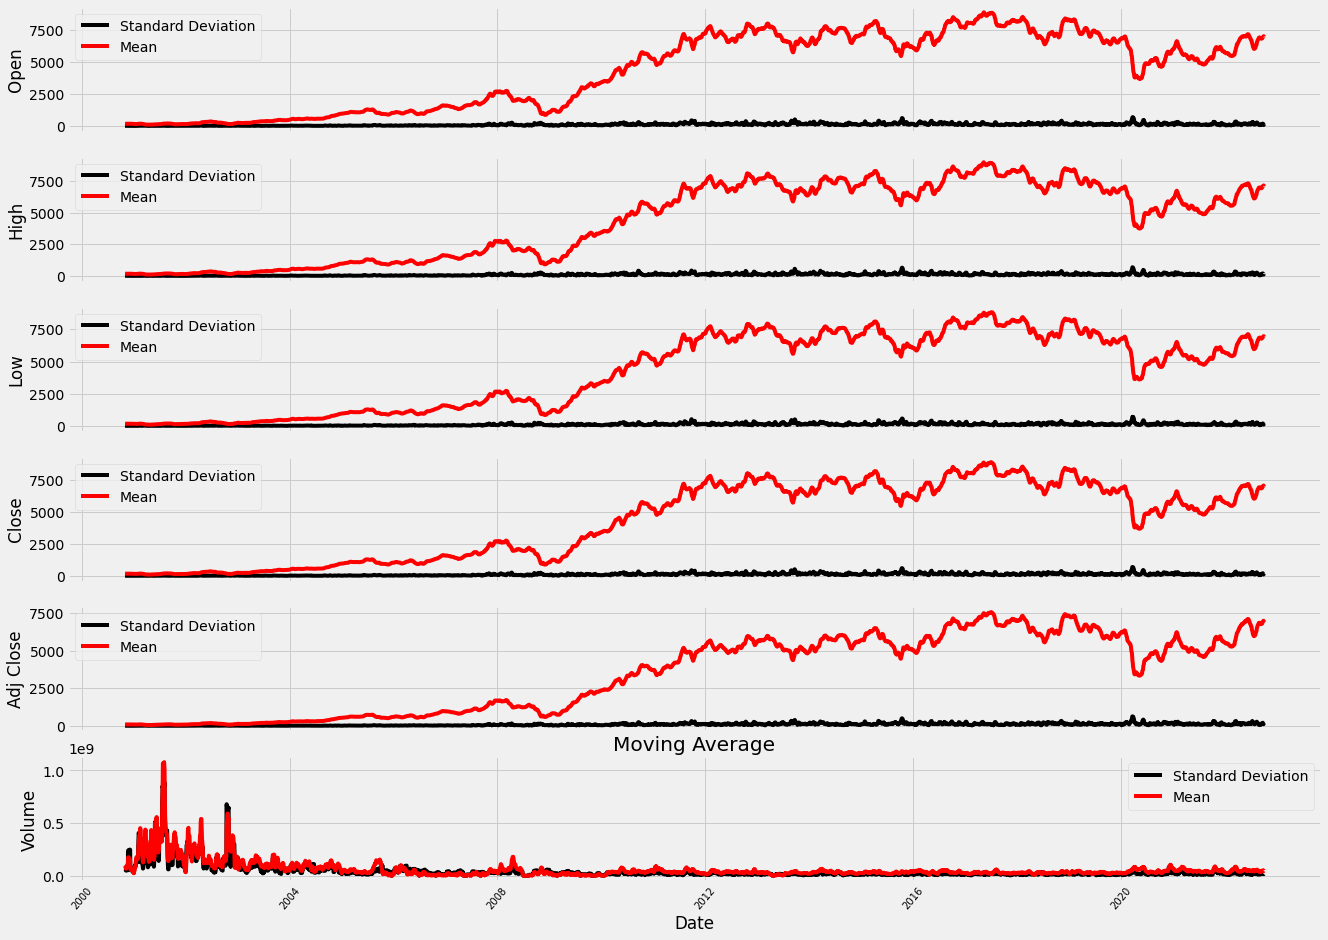

In [9]:
df_plot = df.copy()
ncols = 1
nrows = int(round(df_plot.shape[1]/ncols, 0))
fig, ax = plt.subplots(nrows=nrows, ncols = ncols, sharex=True, figsize=(20, 15))
plt.title('Moving Average')
for i, ax in enumerate(fig.axes):
  moving_avg = df_plot.iloc[:, i].rolling(12).mean()
  std_dev = df_plot.iloc[:, i].rolling(12).std()
  sns.lineplot(data = std_dev, ax=ax, color ="black", label = "Standard Deviation")
  sns.lineplot(data = moving_avg, ax=ax, color="red", label = "Mean")
  ax.tick_params(axis="x", rotation=50, labelsize=10, length=0)
  ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend(loc='best')
plt.legend()
plt.show()

membuat fungsi test_stationarity

In [10]:
def test_stationarity(key):
    timeseries = df[key]
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean and Standard Deviation {key}')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

implementasi fungsi test_stationarity untuk Open, Close dan Volume

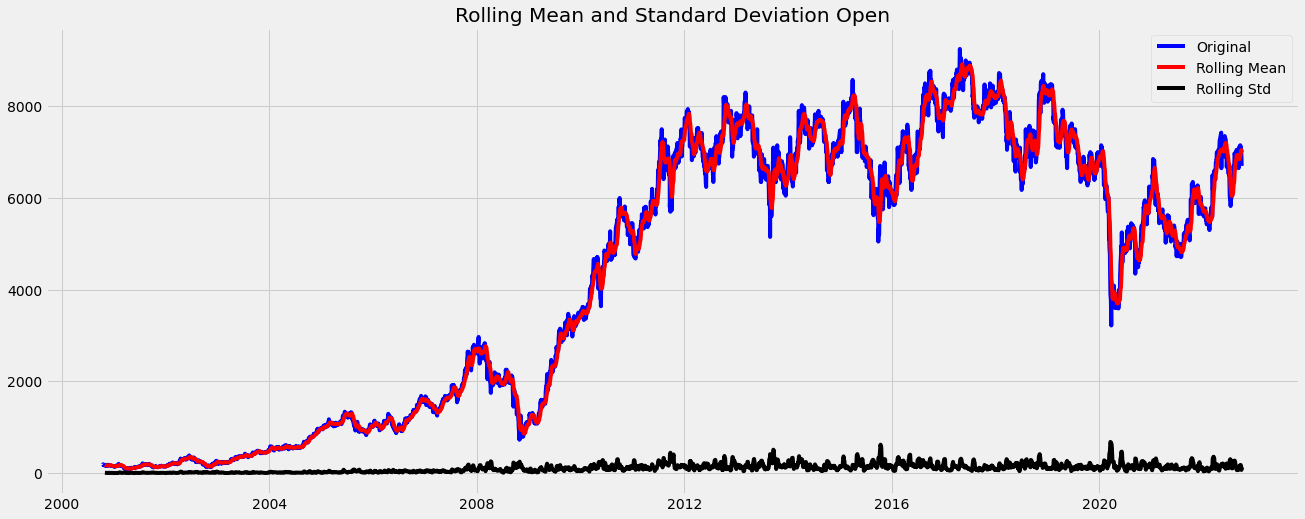

Results of dickey fuller test
Test Statistics                  -1.348268
p-value                           0.606811
No. of lags used                  6.000000
Number of observations used    5487.000000
critical value (1%)              -3.431542
critical value (5%)              -2.862067
critical value (10%)             -2.567050
dtype: float64


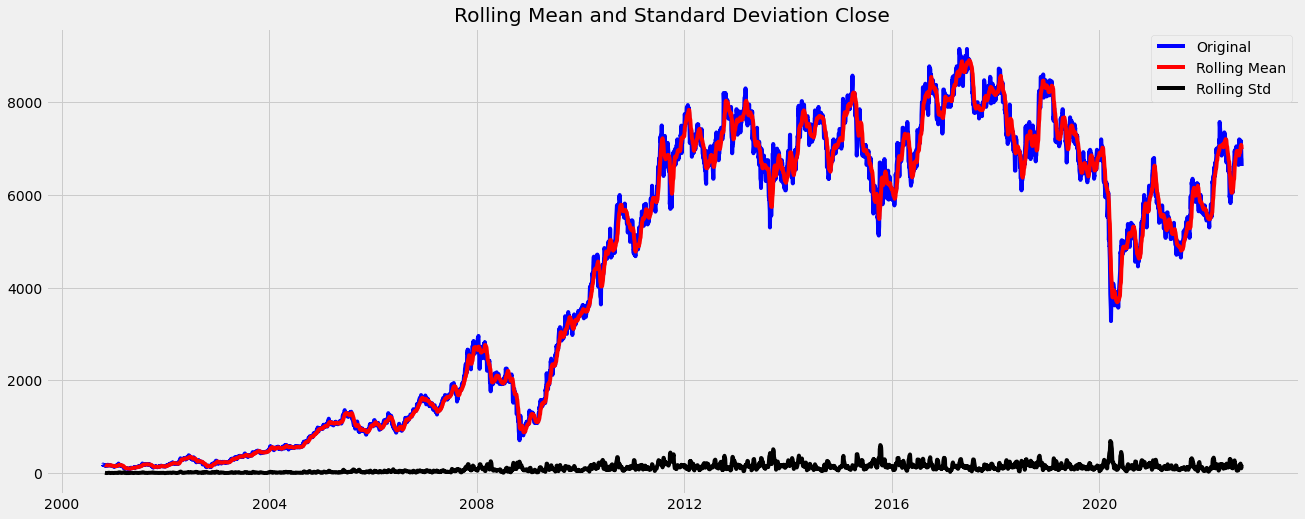

Results of dickey fuller test
Test Statistics                  -1.359241
p-value                           0.601653
No. of lags used                  6.000000
Number of observations used    5487.000000
critical value (1%)              -3.431542
critical value (5%)              -2.862067
critical value (10%)             -2.567050
dtype: float64


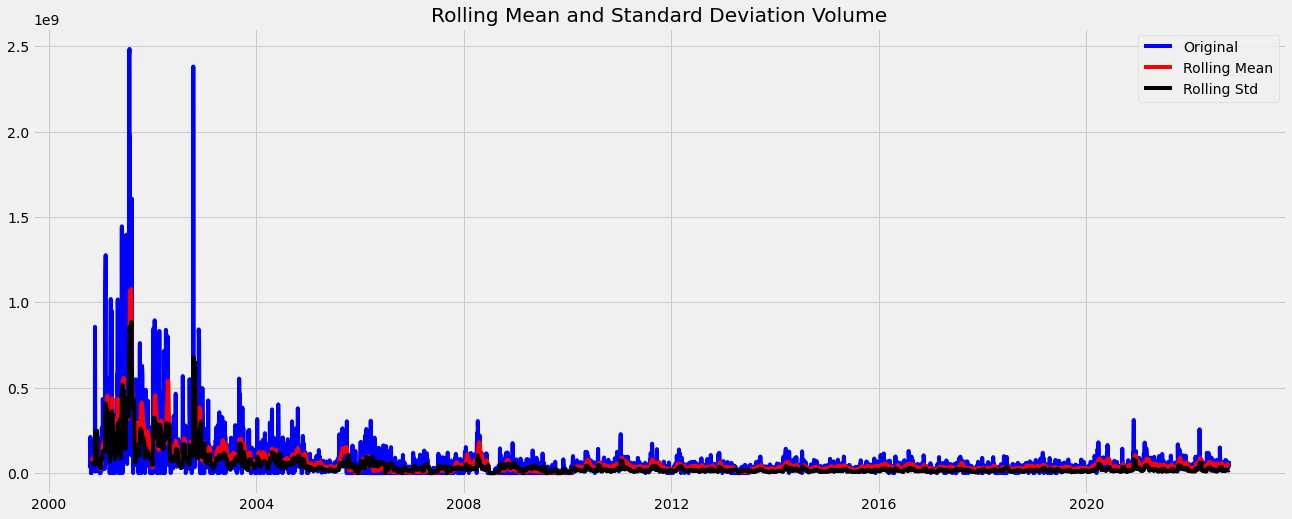

Results of dickey fuller test
Test Statistics                  -5.390047
p-value                           0.000004
No. of lags used                 32.000000
Number of observations used    5461.000000
critical value (1%)              -3.431548
critical value (5%)              -2.862069
critical value (10%)             -2.567052
dtype: float64


In [11]:
test_stationarity('Open')
test_stationarity('Close')
test_stationarity('Volume')

### Data Preparation

Data Preparation diperlukan untuk menghasilkan dataset yang bisa di gunakan untuk Training model, Proses Data Preparation yaitu sebagai berikut

In [12]:
train_df = df.sort_values(by=['Date']).copy()
FEATURES = ['High', 'Low', 'Open', 'Close', 'Volume']
print('Feature List', [f for f in FEATURES])
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

data_filtered_ext.tail()

Feature List ['High', 'Low', 'Open', 'Close', 'Volume']


,High,Low,Open,Close,Volume,Prediction
Date,,,,,,
2022-09-26 00:00:00+07:00,7025.0,6850.0,7000.0,6975.0,61422800,6975.0
2022-09-27 00:00:00+07:00,7050.0,6950.0,7000.0,6950.0,42809400,6950.0
2022-09-28 00:00:00+07:00,7000.0,6800.0,6950.0,6800.0,50825400,6800.0
2022-09-29 00:00:00+07:00,6900.0,6700.0,6850.0,6775.0,36653400,6775.0
2022-09-30 00:00:00+07:00,6750.0,6600.0,6700.0,6625.0,71017400,6625.0


**Scaled Dataset**

In [13]:
nrows = data_filtered.shape[0]

np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)
scaler_pred = MinMaxScaler()
df_close = pd.DataFrame(data_filtered_ext['Close'])
np_close_scaled = scaler_pred.fit_transform(df_close)

(5494, 5)


hasil Scaled Dataset 

In [14]:
np_data_scaled

array([[0.01101721, 0.01151823, 0.01121714, 0.01091689, 0.01217931],
       [0.01059989, 0.01086625, 0.01100629, 0.01027723, 0.01814139],
       [0.01043297, 0.01060546, 0.0105846 , 0.01074631, 0.01759725],
       ...,
       [0.74619824, 0.75534284, 0.74899213, 0.74065037, 0.0204524 ],
       [0.73539817, 0.74409424, 0.73807874, 0.73789133, 0.01474952],
       [0.71919806, 0.73284563, 0.72170866, 0.7213371 , 0.02857777]])

**Train Test Split**
Train dataset memakai 80% dari total dataset, 20% Dataset dialokasikan untuk Test Dataset

In [15]:
sequence_length = 50
train_precentage = 0.8
index_close = data.columns.get_loc("Close")
train_data_len = math.ceil(np_data_scaled.shape[0] * train_precentage)
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

Membuat x_train, y_train, x_test dan y_test

In [16]:
def partition_dataset(sequence_length, data):
  x, y = [], []
  data_len = data.shape[0]
  for i in range(sequence_length, data_len):
    x.append(data[i - sequence_length:i, :])
    y.append(data[i, index_close])
  
  x = np.array(x)
  y = np.array(y)
  return x, y

x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train[1][sequence_length-1][index_close])
print(y_train[0])

(4346, 50, 5) (4346,)
(1098, 50, 5) (1098,)
0.007249496104341098
0.007249496104341098


hasil x_train array yang sudah di scaled

In [17]:
x_train

array([[[0.01101721, 0.01151823, 0.01121714, 0.01091689, 0.01217931],
        [0.01059989, 0.01086625, 0.01100629, 0.01027723, 0.01814139],
        [0.01043297, 0.01060546, 0.0105846 , 0.01074631, 0.01759725],
        ...,
        [0.00709442, 0.0078237 , 0.00759055, 0.00746272, 0.00935708],
        [0.00730308, 0.00760638, 0.00759055, 0.0072495 , 0.01734992],
        [0.00688576, 0.0078237 , 0.0073797 , 0.0072495 , 0.        ]],

       [[0.01059989, 0.01086625, 0.01100629, 0.01027723, 0.01814139],
        [0.01043297, 0.01060546, 0.0105846 , 0.01074631, 0.01759725],
        [0.01126761, 0.01021428, 0.01159667, 0.00980814, 0.08531505],
        ...,
        [0.00730308, 0.00760638, 0.00759055, 0.0072495 , 0.01734992],
        [0.00688576, 0.0078237 , 0.0073797 , 0.0072495 , 0.        ],
        [0.00688576, 0.0078237 , 0.0073797 , 0.0072495 , 0.        ]],

       [[0.01043297, 0.01060546, 0.0105846 , 0.01074631, 0.01759725],
        [0.01126761, 0.01021428, 0.01159667, 0.00980814, 0.0

evaluasi dataset yang sudah di scaled dan di split

In [47]:
x_train_len = x_train.shape
train_len = x_train_len[0]
x_test_len = x_test.shape
test_len = x_test_len[0]
print('train length', train_len)
print('test length', test_len)
print('Total Dataset', train_len + test_len)

train length 4346
test length 1098
Total Dataset 5444


### **Modeling**

melakukan import Tensorflow beserta komponen yang di perlukan untuk membuat model dan training model. serta melakukan check versi Tensorflow dan ketersediaan GPU

In [48]:
import tensorflow as tf
import os, sys, psutil, gc, keras
from keras import backend as K
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.python import client

physical_devices = tf.config.list_physical_devices('GPU')

print('Tensorflow Version: ' + tf.__version__)
print("Number of GPUs:", len(physical_devices))

Tensorflow Version: 2.8.2
Number of GPUs: 1


menetapkan jumlah steps dan n_features pada input shape LSTM, serta jumlah neurons untuk LSTM dan hidden layer Bidirectional LSTM

In [49]:
n_steps = x_train.shape[1]
n_features = x_train.shape[2]
n_neurons = n_steps * n_features 
print('Neurons: ', n_neurons)
print('Steps: ', n_steps)
print('N Features: ', n_features)

Neurons:  250
Steps:  50
N Features:  5



Untuk model Marchine Learning saya memakai Tensorflow dengan mengunakan Recurrent Neural Networks (RNN), implementasi RNN pada model memakai metode Regression Multivarian, yang di mana terdapat 5 parameter yang dipakai untuk Input Shape. 
Pengunaan LSTM dipilih karena LSTM dapat menyajikan informasi dari riwayat penyimpanan yang telah disimpan cukup lama. LSTM juga mampu untuk mengklasifikasikan dan menghapus informasi yang telah usang. Kemampuan itu membuat LSTM cocok untuk implementasi Time Series Forecasting. Bidirectional LSTM juga dipakai untuk hidden layer agar hidden layer bisa mengambil data secara dua arah tampa mengabaikan konteks dari data yang di baca sehingga model bisa memberikan prediksi yang lebih akurat.

model dituliskan dalam arsitektur berikut

In [50]:
model = Sequential()
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(n_neurons, return_sequences=True)))
model.add(Bidirectional(LSTM(n_neurons, return_sequences=True)))
model.add(Bidirectional(LSTM(n_neurons, return_sequences=False)))
model.add(Dense((n_steps * n_neurons)))
model.add(Dense(n_neurons))
model.add(Dense(n_features))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, 
              loss= MeanSquaredError(),
              metrics=[MeanAbsoluteError()])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 250)           256000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 50, 500)          1002000   
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 50, 500)          1502000   
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 500)              1502000   
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 12500)             6262500   
                                                      

kalkulasi batchSize berdasarkan ketersediaan VRAM ataupun RAM jika GPU tidak tersedia 

In [51]:
def BatchSizeCalculator(model):
    import tensorflow
    BatchFound= 16
    device = ["CPU", "GPU"]
    try:
        total_params= int(model.count_params())
        GCPU= device[0]
        try:
            if K.tensorflow_backend._get_available_gpus()== []:
                GCPU= device[0]
            else:
                GCPU= device[1]
        except:
            from tensorflow.python.client import device_lib;
            def get_available_gpus():
                local_device_protos= device_lib.list_local_devices()
                return [x.name for x in local_device_protos if x.device_type == device[1]]
            if "gpu" not in str(get_available_gpus()).lower():
                GCPU= device[0]
            else:
                GCPU= device[1]
  
        if (GCPU== device[1]) and (os.cpu_count() >15) and (total_params <1000000):
            BatchFound= 64    
        if (os.cpu_count() <16) and (total_params <500000):
            BatchFound= 64  
        if (GCPU== device[1]) and (os.cpu_count() >15) and (total_params <2000000) and (total_params >=1000000):
            BatchFound= 32      
        if (GCPU== device[1]) and (os.cpu_count() >15) and (total_params >=2000000) and (total_params <10000000):
            BatchFound= 16  
        if (GCPU== device[1]) and (os.cpu_count() >15) and (total_params >=10000000):
            BatchFound= 8       
        if (os.cpu_count() <16) and (total_params >5000000):
            BatchFound= 8    
        if total_params >100000000:
            BatchFound= 1

    except:
        pass
    try:
        memoryused= psutil.virtual_memory()
        memoryused= float(str(memoryused).replace(" ", "").split("percent=")[1].split(",")[0])
        if memoryused >75.0:
            BatchFound= 8
        if memoryused >85.0:
            BatchFound= 4
        if memoryused >90.0:
            BatchFound= 2
        if total_params >100000000:
            BatchFound= 1
        print("Calculate Batch Size:  "+ str(BatchFound))  
        gc.collect()
    except:
        pass

    memoryused= []   
    total_params= []   
    GCPU= ""
    del memoryused, total_params, GCPU
    gc.collect()
    return BatchFound

menetapkan Batch Size, Epoch, Steps per Epoch dan validation steps

In [52]:
batchsize = BatchSizeCalculator(model)
steps_per_epoch = 100
epoch = math.ceil((train_len / batchsize) / steps_per_epoch) * 2
validation_steps = math.ceil(steps_per_epoch * (1 - train_precentage))
batch_size = batchsize

print('Epoch', epoch)
print('Steps per Epoch', steps_per_epoch)
print('Validation Steps', validation_steps)

Calculate Batch Size:  8
Epoch 12
Steps per Epoch 100
Validation Steps 20


Training model beserta melakukan save callback Training ke dalam format CSV, save model ke bentuk .h5. digunakan juga EarlyStopping untuk meminimalisis loss dan overfitting

In [53]:
saveLog =  tf.keras.callbacks.CSVLogger('asii-jk_TIMESERIES_LOG.csv',separator=',')
early_stop = EarlyStopping(monitor='loss', 
                           patience=5, 
                           verbose=1)
with tf.device('/device:GPU:0'):
  history = model.fit(
                    x_train,
                    y_train,
                    epochs= epoch,
                    steps_per_epoch= steps_per_epoch,
                    validation_steps= validation_steps,
                    batch_size= batch_size,
                    callbacks = [early_stop, saveLog],
                    validation_data=(x_test, y_test),
                    use_multiprocessing = True
                    )
model.save('asii-jk_TIMESERIES.h5')

Epoch 1/12
100/100 [==============================] - 21s 66ms/step - loss: 0.5674 - mean_absolute_error: 0.2649 - val_loss: 0.0033 - val_mean_absolute_error: 0.0469
Epoch 2/12
100/100 [==============================] - 3s 27ms/step - loss: 0.0012 - mean_absolute_error: 0.0257 - val_loss: 0.0019 - val_mean_absolute_error: 0.0369
Epoch 3/12
100/100 [==============================] - 3s 27ms/step - loss: 0.0010 - mean_absolute_error: 0.0234 - val_loss: 0.0017 - val_mean_absolute_error: 0.0332
Epoch 4/12
100/100 [==============================] - 3s 27ms/step - loss: 0.0011 - mean_absolute_error: 0.0252 - val_loss: 0.0027 - val_mean_absolute_error: 0.0428
Epoch 5/12
100/100 [==============================] - 3s 27ms/step - loss: 7.4447e-04 - mean_absolute_error: 0.0201 - val_loss: 0.0018 - val_mean_absolute_error: 0.0345
Epoch 6/12
100/100 [==============================] - 3s 27ms/step - loss: 0.0015 - mean_absolute_error: 0.0309 - val_loss: 0.0013 - val_mean_absolute_error: 0.0294
Epoch

### **Evaluation**

evaluasi hasil training model

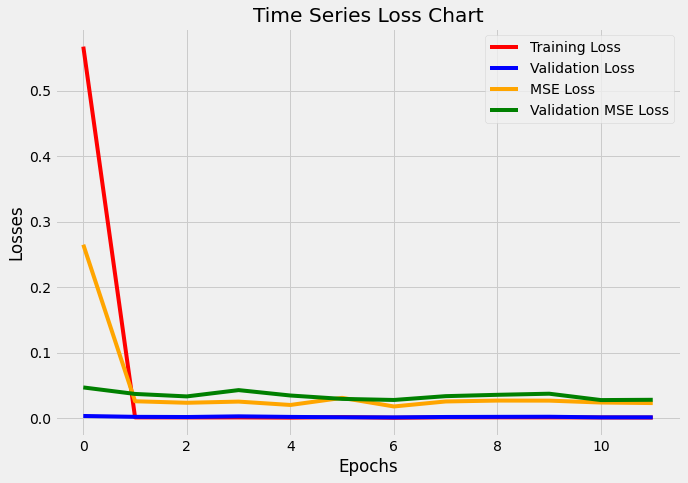

In [54]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"], label='Training Loss', color='Red')
plt.plot(history.history["val_loss"], label='Validation Loss', color='Blue')
plt.plot(history.history["mean_absolute_error"], label='MSE Loss', color='Orange')
plt.plot(history.history["val_mean_absolute_error"], label='Validation MSE Loss', color = 'Green')
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Time Series Loss Chart")
plt.legend()
plt.show()

Setelah training model selesai, maka saatnya melakukan Evaluasi hasil Training, disini Metrik akurasi yang digunakan yaitu Median Absolute Error (MAE),
Mean Absolute Percentage Error (MAPE) dan Median Absolute Percentage Error (MDAPE)

In [55]:
y_pred_scaled = model.predict(x_test)

y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

MAE = mean_absolute_error(y_test_unscaled, y_pred)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100

roundMae = np.round(MAE, 2)
roundMape = np.round(MAPE, 2)
roundMdape = np.round(MDAPE, 2)
print(f'Median Absolute Error (MAE): {roundMae} ')
print(f'Mean Absolute Percentage Error (MAPE): {roundMape} %')
print(f'Median Absolute Percentage Error (MDAPE): {roundMape} %')

Median Absolute Error (MAE): 197.51 
Mean Absolute Percentage Error (MAPE): 3.27 %
Median Absolute Percentage Error (MDAPE): 3.27 %


membuat fungsi predictByStartDate, fungsi ini berfungsi membuat chart untuk menampilkan prediksi jangka pendek, menengah dan panjang berdasarkan tanggal awal yang di isi

In [56]:
def predictByStartDate(date = "2022-01-01"):
  display_start_date = date 

  train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'y_train'})
  valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'y_test'})
  valid.insert(1, "y_pred", y_pred, True)
  valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
  df_union = pd.concat([train, valid])

  df_union_zoom = df_union[df_union.index > display_start_date]

  fig, ax1 = plt.subplots(figsize=(16, 8))
  plt.title("y_prediction and y_test Chart")
  plt.ylabel(stockName, fontsize=18)
  sns.set_palette(["#090364", "#1960EF", "#EF5919"])
  sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], 
               linewidth=1.0, dashes=False, ax=ax1)

  df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
  ax1.bar(height=df_union_zoom['residuals'].dropna(), 
          x=df_union_zoom['residuals'].dropna().index, 
          width=3, 
          label='residuals', 
          color=df_sub)
  plt.legend()
  plt.show()

membuat fungsi predictNextDay untuk memprediksi harga saham di hari berikutnya

In [57]:
def predictNextDay():
  df_temp = df[-sequence_length:]
  new_df = df_temp.filter(FEATURES)

  N = sequence_length

  last_N_days = new_df[-sequence_length:].values
  last_N_days_scaled = scaler.transform(last_N_days)

  X_test_new = []
  X_test_new.append(last_N_days_scaled)

  pred_price_scaled = model.predict(np.array(X_test_new))
  pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

  price_today = np.round(new_df['Close'][-1], 2)
  predicted_price = math.ceil(np.round(pred_price_unscaled.ravel()[0], 2))
  change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

  plus = '+'; minus = ''
  information = f'{stockName} at {endDate} was {price_today}'
  pricePrecentages = f'{predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)'
  print(f'The close price for ', information)
  print(f'The predicted close price is ', pricePrecentages)

Short Term Prediction

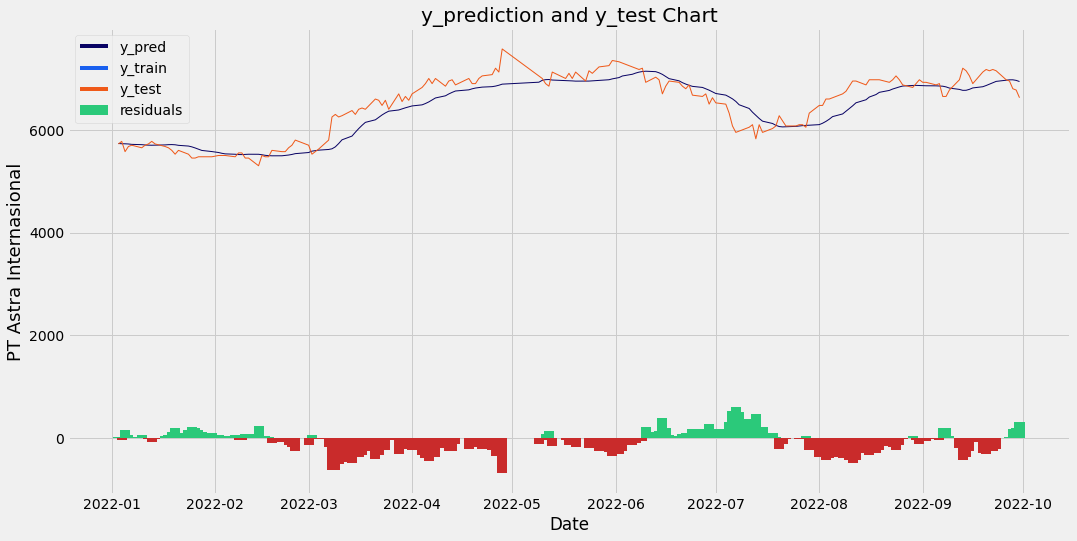

In [58]:
predictByStartDate()

Medium Term Prediction

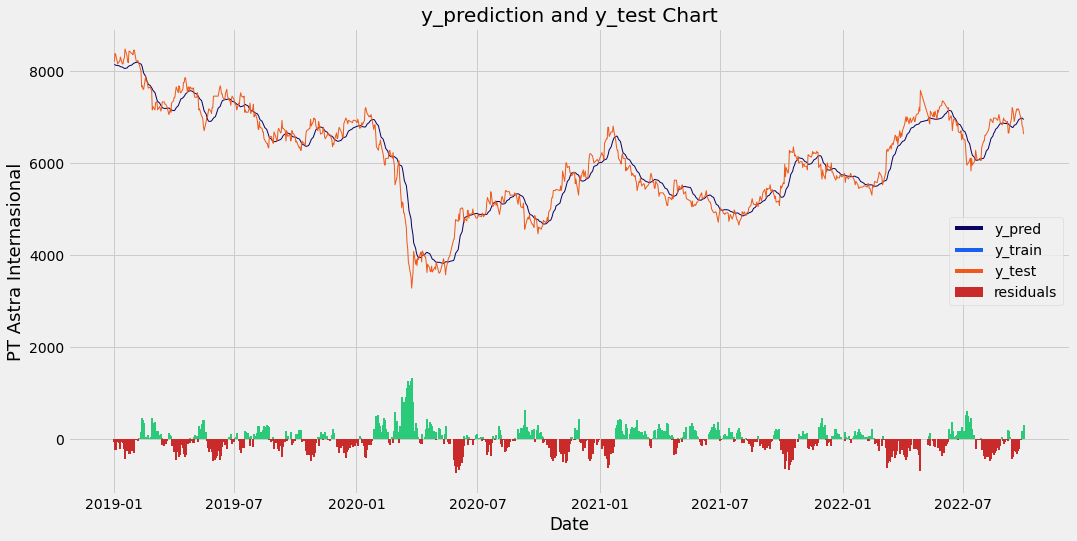

In [59]:
predictByStartDate('2019-01-01')

Long Term Prediction

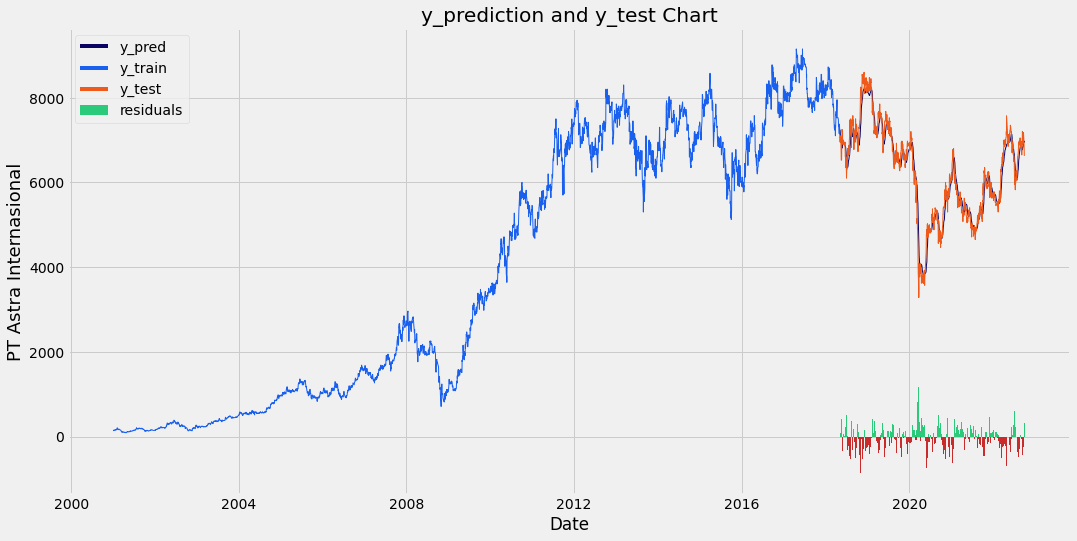

In [60]:
predictByStartDate('2001-01-01')

Next Day Prediction

In [61]:
predictNextDay()

The close price for  PT Astra Internasional at 2022-10-01 was 6625.0
The predicted close price is  6905 (+4.06%)
